In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


Using TensorFlow backend.


60000 train samples
10000 test samples


In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
from copy import deepcopy
import numpy as np

In [23]:
x_train.shape

(60000, 28, 28, 1)

In [24]:
history_log = []
evaluation_log = []

epochs = 10
for corrup_procentage in range(10, 100, 10):
    current_model = deepcopy(model)

    shape = y_train.shape
    size = int(shape[0] * corrup_procentage / 100 )
    print(size)
    new_train_y = y_train.copy()
    new_train_y[-size:,:] = np.random.randint(0, 10, size=(size, 10))
    
    new_train_x = x_train.copy()
    new_train_x[-size:,:] = np.random.uniform(size=(size, 28, 28, 1))
    
    history = deepcopy(model).fit(x_train, new_train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
        shuffle =True)
    history_log.append(deepcopy(history))
    evaluation_log.append(model.evaluate(x_test, y_test))  

import pickle
pickle_out = open("history_log.pickle","wb")
pickle.dump(history_log, pickle_out)

pickle_out = open("evaluation_log.pickle","wb")
pickle.dump(evaluation_log, pickle_out)

KeyboardInterrupt: 

In [4]:
import pickle
history_normal_pickle  = pickle.load(open("history_log.pickle","rb"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


<IPython.core.display.Javascript object>


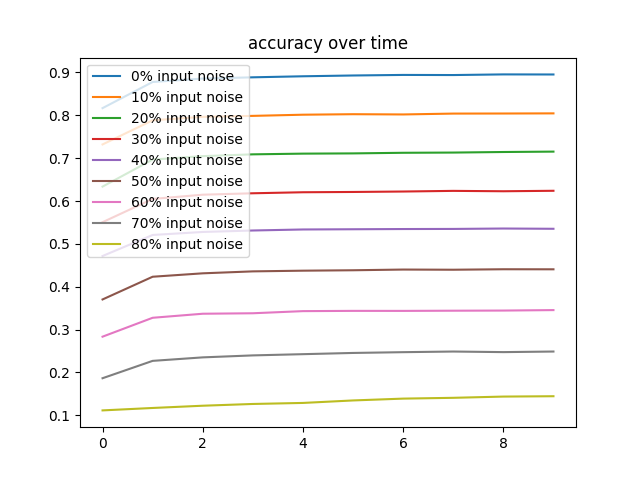

In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt
for index, model_history in enumerate(history_normal_pickle):
    plt.plot(model_history.history['acc'], label="{}% input noise".format(index * 10))
plt.title("accuracy over time")
plt.legend(loc='upper left')

In [2]:
import pickle
evaluation_log_pickle  = pickle.load(open("evaluation_log.pickle","rb"))

<IPython.core.display.Javascript object>


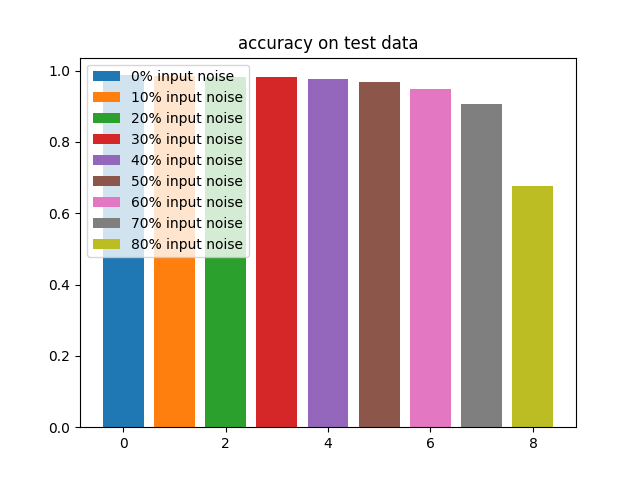

In [20]:
%matplotlib notebook
import matplotlib.pyplot as plt
for index, model_eval in enumerate(evaluation_log_pickle):
    plt.bar(index, model_eval[1], label="{}% input noise".format(index * 10))
plt.legend(loc='upper left')
plt.title("accuracy on test data")